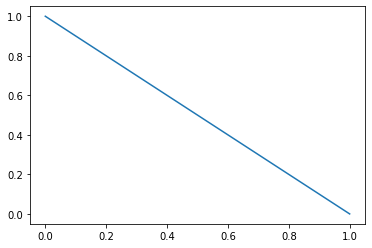

INFO:root:test
INFO:root:test


(-75, -56)
Import of general_pyNN.PYNNBackend failed due to:
No module named 'pyNN'


'\n\nclass TracePrints(object):\n  def __init__(self):    \n    self.stdout = sys.stdout\n  def write(self, s):\n    self.stdout.write("Writing %r\n" % s)\n    traceback.print_stack(file=self.stdout)\n\nsys.stdout = TracePrints()\n'

In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
import hide_imports

import sys
import traceback


In [2]:

def jrt(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]

    OM = hide_imports.OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM


def permutations(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = model_parameters.MODEL_PARAMS[backend]
    ga_out0 = use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True}, MU=2,NGEN=1)
    ga_out1 =  use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=2,NGEN=1,seed_pop=ga_out0['pf'][0])

    
    dtc = ga_out1['pf'][0].dtc
    vm,plt = inject_and_plot_model(dtc.attrs,dtc.backend)

    return dtc, ga_out1['DO'], vm


In [3]:
test_frame = hide_imports.get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
OMObjects = []
backends = ["RAW","HH"]#"ADEXP","BHH"]
tt = test_frame['Neocortex pyramidal cell layer 5-6']
tt = tt.tests


# Round trip testing below

In [4]:

#for t in test_frame.values():
#    break
    
for b in backends:        
    OM = jrt(hide_imports.copy.copy(tt),b)
    OMObjects.append(OM)
rt_outs = []
from neuronunit.optimisation.optimization_management import inject_and_plot_model


RAW
Random simulated data tests made
[<neuronunit.optimisation.data_transport_container.DataTC object at 0x7f5bcfeb4b00>, <neuronunit.optimisation.data_transport_container.DataTC object at 0x7f5bcfeb4b00>]
{'value': array(115.41852951) * pA, 'mean': array(115.41852951) * pA, 'std': array(115.41852951) * pA}
ranges OrderedDict([('C', (50, 200)), ('k', (0.7, 1.6)), ('vr', (-75, -56)), ('vt', (-50, -40)), ('vPeak', (25, 50)), ('a', (0.01, 0.03)), ('b', (-2, 15)), ('c', (-60, -40)), ('d', (10, 150)), ('dt', [0.005, 0.005])]) maybe ranges are wrong
[{'value': array(115.41852951) * pA, 'mean': array(115.41852951) * pA, 'std': array(115.41852951) * pA}, {'value': array(36645914.58993839) * kg*m**2/(s**3*A**2), 'mean': array(36645914.58993839) * kg*m**2/(s**3*A**2), 'std': array(36645914.58993839) * kg*m**2/(s**3*A**2)}, {'value': array(3.9314053) * s, 'mean': array(3.9314053) * s, 'std': array(3.9314053) * s}, {'value': array(1.07280862e-07) * s**4*A**2/(kg*m**2), 'mean': array(1.07280862e-07

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest,total
observations,115.41852951049805 pA,36645914.589938395 kg*m**2/(s**3*A**2),3.9314052985988317 s,1.0728086179839128e-07 s**4*A**2/(kg*m**2),-61.42530309488211 mV,0.00055 s,[52.31702893458377 mV],-17.505257787847192 mV,NaN
predictions,94.16356086730957 pA,60071148.04384201 kg*m**2/(s**3*A**2),0.0032820856826905275 s,5.4636639877352564e-11 s**4*A**2/(kg*m**2),-75.0 mV,0.0004 s,55.76126868382986 mV,-30.76126868382986 mV,NaN
scores,-0.184156,0.639232,-0.999165,-0.999491,-1.91047e+15,-2.72727,0.065834,-7.57259,1.910469e+15


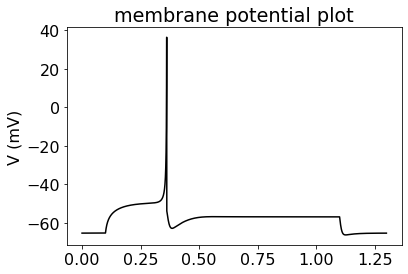

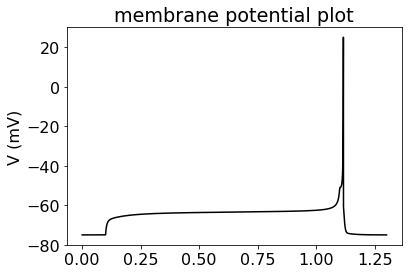

In [7]:
OM = OMObjects[0]
print(OM.backend)
x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
OM.tests = hide_imports.TSD(OM.tests)
rt_out = OM.round_trip_test(OM.tests,OM.backend,OM.boundary_dict,NGEN = 4, MU = 20)
rt_outs.append(rt_out)     
origin_target = rt_outs[-1][2][0]
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[-1][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)
found.obs_preds



In [6]:
origin_target.obs_preds

AttributeError: 'DataTC' object has no attribute 'obs_preds'

In [ ]:
OM = OMObjects[1]
print(OM.backend)
x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
OM.tests = hide_imports.TSD(OM.tests)
rt_out = OM.round_trip_test(OM.tests,OM.backend,OM.boundary_dict,NGEN = 4, MU = 4)
rt_outs.append(rt_out)     
origin_target = rt_outs[-1][2][0]
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[-1][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)


In [ ]:
origin_target = rt_outs[0][2][0]
from neuronunit.optimisation.optimization_management import inject_and_plot_model
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[0][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)

In [ ]:
display(rt_outs[0][0]['pf'][0].dtc.backend)
display(rt_outs[0][0]['pf'][0].dtc.SA)


In [ ]:
display(rt_outs[1][0]['pf'][0].dtc.backend)
display(rt_outs[1][0]['pf'][0].dtc.SA)


In [ ]:

display(rt_outs[2][0]['pf'][0].dtc.backend)
display(rt_outs[2][0]['pf'][0].dtc.SM)


In [ ]:
try:
    display(rt_outs[3][0]['pf'][0].dtc.backend)
    display(rt_outs[3][0]['pf'][0].dtc.SM)
except:
    pass

In [ ]:

backends = ["RAW","HH","ADEXP","BHH"]


for t in test_frame.values():
    for b in backends:
        
        (dtc,DO,vm) = permutations(copy.copy(t),b)
        print(b)
        display(dtc.SM)
        display(dtc.obs_preds)
        plt.plot(vm.times,vm.magnitude)
        plt.show()




In [ ]:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"ADEXP")
display(dtc.SM)
display(dtc.obs_preds)

In [ ]:

backends = ["RAW","HH","BHH"]  



#for b in backends:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"RAW")


In [ ]:
backends = iter(["RAW","HH","BHH"])


from IPython.display import HTML, display

for b in backends:
    (dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],b)
    display(dtc.SM)
    display(dtc.obs_preds)



In [ ]:
#test_frame['Neocortex pyramidal cell layer 5-6']

##### 